## Tutorial 7: Modifying the instantiated network interactively
* http://doc.netpyne.org/tutorial.html#tutorial-7-modifying-the-instantiated-network-interactively

* We will model a Hopfield-Brody network where cells are connected all-to-all and firing synchronize due to mutual inhibition (inhibition from other cells provides a reset, locking them together). 
* The level of synchronization depends on the connection weights, which we will modify interactively.
* set the weights to 0 initially:

In [1]:
from netpyne import specs

###############################################################################
# NETWORK PARAMETERS
###############################################################################

netParams = (
    specs.NetParams()
)  # object of class NetParams to store the network parameters

# Cell parameters
## PYR cell properties
secs = {}
secs["soma"] = {"geom": {}, "topol": {}, "mechs": {}}
secs["soma"]["geom"] = {"diam": 18.8, "L": 18.8}
secs["soma"]["mechs"]["hh"] = {"gnabar": 0.12, "gkbar": 0.036, "gl": 0.003, "el": -70}
netParams.cellParams["PYR"] = {"secs": secs}  # add dict to list of cell properties

# Population parameters
netParams.popParams["hop"] = {
    "cellType": "PYR",
    "cellModel": "HH",
    "numCells": 50,
}  # add dict with params for this pop
# netParams.popParams['background'] = {'cellModel': 'NetStim', 'rate': 50, 'noise': 0.5}  # background inputs

# Synaptic mechanism parameters
netParams.synMechParams["exc"] = {"mod": "Exp2Syn", "tau1": 0.1, "tau2": 1.0, "e": 0}
netParams.synMechParams["inh"] = {"mod": "Exp2Syn", "tau1": 0.1, "tau2": 1.0, "e": -80}

# Stimulation parameters
netParams.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 50, "noise": 0.5}
netParams.stimTargetParams["bkg->all"] = {
    "source": "bkg",
    "conds": {"pop": "hop"},
    "weight": 0.1,
    "delay": 1,
    "synMech": "exc",
}

# Connectivity parameters
netParams.connParams["hop->hop"] = {
    "preConds": {"pop": "hop"},  # presynaptic conditions
    "postConds": {"pop": "hop"},  # postsynaptic conditions
    "weight": 0.0,  # weight of each connection, initially 0.0
    "synMech": "inh",  # target inh synapse
    "delay": 5,
}  # delay

--No graphics will be displayed.


In [2]:
###############################################################################
# SIMULATION PARAMETERS
###############################################################################
simConfig = (
    specs.SimConfig()
)  # object of class SimConfig to store simulation configuration

# Simulation options
simConfig.duration = 0.5 * 1e3  # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {
    "V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}
}  # Dict with traces to record
simConfig.recordStep = 1  # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = "./results/Tutorial07/tut7-1"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file

simConfig.analysis["plotRaster"] = {"syncLines": True, "saveFig": True}  # Plot a raster
simConfig.analysis["plotTraces"] = {
    "include": [1],
    "saveFig": True,
}  # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = {
    "saveFig": True
}  # plot 2D cell positions and connections

In [3]:
###############################################################################
# EXECUTION CODE (via netpyne)
###############################################################################
from netpyne import sim

# Create network and run simulation
sim.initialize(  # create network object and set cfg and net params
    simConfig=simConfig,  # pass simulation config and network params as arguments
    netParams=netParams,
)
sim.net.createPops()  # instantiate network populations
sim.net.createCells()  # instantiate network cells based on defined populations
sim.net.connectCells()  # create connections between cells based on params
sim.net.addStims()  # add stimulation
sim.setupRecording()  # setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()  # run parallel Neuron simulation
sim.gatherData()  # gather spiking data and cell info from each node
sim.saveData()  # save params, cell info and sim output to file (pickle,mat,txt,etc)
sim.analysis.plotData()  # plot spike raster
# previously we did this in one step with sim.createSimulateAnalyze()


Start time:  2024-10-30 10:34:00.496569




Creating network of 1 cell populations on 1 hosts...: 100%|##########|


  Number of cells on node 0: 50 
  Done; cell creation time = 0.02 s.
Making connections...


  hop->hop: 100%|##########| Creating synaptic connections for 50/50 postsynaptic cells on node 0 (all-to-all connectivity)


  Number of connections on node 0: 2450 
  Done; cell connection time = 0.22 s.
Adding stims...
  Number of stims on node 0: 50 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation using NEURON for 500.0 ms...
  Done; run time = 1.46 s; real-time ratio: 0.34.

Gathering data...
  Done; gather time = 0.07 s.

Analyzing...
  Cells: 50
  Connections: 2500 (50.00 per cell)
  Spikes: 1261 (50.44 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 1.46 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell
Plotting 2D representation of network cell locations and connections...
  Done; plotting time = 2.05 s

Total time = 3.83 s


In [4]:
# possible attributes of a cell can be accesible
print(sim.net.cells[0])
print(sim.net.cells[0].tags)
print(sim.net.cells[0].secs)
print(sim.net.cells[0].conns)
print(sim.net.cells[0].stims)

compartCell_PYR_HH_0
{'cellType': 'PYR', 'cellModel': 'HH', 'pop': 'hop', 'xnorm': 0.8039496061848593, 'ynorm': 0.034381182856303365, 'znorm': 0.7392647062104045, 'x': 80.39496061848594, 'y': 3.4381182856303365, 'z': 73.92647062104045, 'label': ['PYR']}
{soma: {mechs: {hh: {gnabar: 0.12, gkbar: 0.036, gl: 0.003, el: -70}}, geom: {diam: 18.8, L: 18.8}, topol: {}, hObj: compartCell_PYR_HH_0.soma, synMechs: [{label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1, tau2: 1.0, e: -80, hObj: Exp2Syn[0]}, {label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1, tau2: 1.0, e: -80, hObj: Exp2Syn[1]}, {label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1, tau2: 1.0, e: -80, hObj: Exp2Syn[2]}, {label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1, tau2: 1.0, e: -80, hObj: Exp2Syn[3]}, {label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1, tau2: 1.0, e: -80, hObj: Exp2Syn[4]}, {label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1, tau2: 1.0, e: -80, hObj: Exp2Syn[5]}, {label: 'inh', loc: 0.5, mod: 'Exp2Syn', tau1: 0.1,

In [5]:
print(sim.net.pops.keys())
print(sim.net.pops["hop"].cellGids)
print(sim.net.pops["hop"].tags)

odict_keys(['hop'])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{cellType: 'PYR', cellModel: 'HH', numCells: 50, pop: 'hop'}


In [6]:
# Data is also available via the sim object
print(sim.allSimData.keys())
print(sim.allSimData["spkt"])
print(sim.allSimData["V_soma"]["cell_1"])
print(sim.allSimData["spkid"])
print(sim.allSimData["avgRate"])

dict_keys(['spkt', 'spkid', 'V_soma', 't', 'avgRate'])
[1.6000000000999963, 2.4750000001000014, 2.575000000100003, 2.600000000100003, 2.7500000001000053, 2.875000000100007, 3.0500000001000096, 3.425000000100015, 3.425000000100015, 3.7500000001000195, 4.300000000100027, 5.600000000100046, 5.625000000100046, 5.850000000100049, 5.9250000001000505, 6.0000000001000515, 6.025000000100052, 6.275000000100055, 6.525000000100059, 6.62500000010006, 6.825000000100063, 6.900000000100064, 7.175000000100068, 7.225000000100069, 7.27500000010007, 7.8250000001000775, 8.00000000010008, 8.35000000010006, 8.425000000100056, 9.125000000100016, 9.150000000100015, 9.57500000009999, 9.92500000009997, 10.45000000009994, 10.62500000009993, 11.075000000099905, 11.35000000009989, 12.200000000099841, 13.125000000099789, 13.500000000099767, 13.525000000099766, 13.97500000009974, 14.375000000099718, 15.350000000099662, 15.475000000099655, 16.65000000009959, 17.625000000099533, 17.925000000099516, 18.125000000099504, 

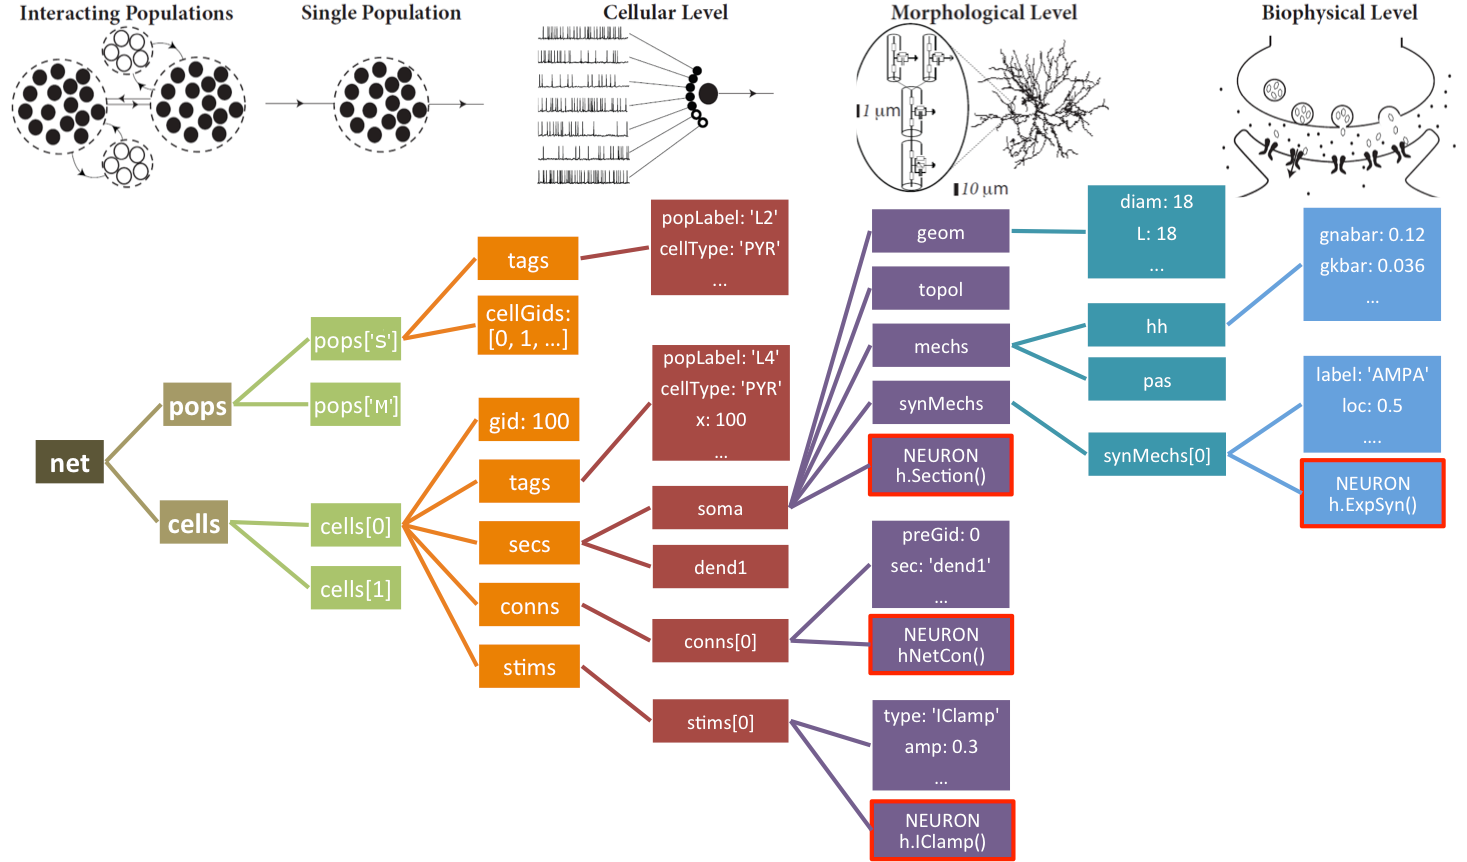

In [7]:
###############################################################################
# INTERACTING WITH INSTANTIATED NETWORK
###############################################################################

# modify conn weights
sim.net.modifyConns({"conds": {"label": "hop->hop"}, "weight": 0.5})
simConfig.filename = "./results/Tutorial07/tut7-1_w05"
sim.runSim()  # run parallel Neuron simulation
sim.gatherData()  # gather spiking data and cell info from each node
sim.saveData()  # save params, cell info and sim output to file (pickle,mat,txt,etc)
sim.analysis.plotData()  # plot spike raster

Modfying connection parameters...
  Done; connections modification time = 0.02 s.

Running simulation using NEURON for 500.0 ms...
  Done; run time = 1.77 s; real-time ratio: 0.28.

Gathering data...
  Done; gather time = 0.06 s.

Analyzing...
  Cells: 50
  Connections: 2500 (50.00 per cell)
  Spikes: 583 (23.32 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 1.77 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell
Plotting 2D representation of network cell locations and connections...
  Done; plotting time = 1.88 s


In [9]:
# modify cells geometry
sim.net.modifyCells({"conds": {"pop": "hop"}, "secs": {"soma": {"geom": {"L": 160}}}})
simConfig.filename = "./results/Tutorial07/tut7-1_L160"
sim.simulate()  # runSim and gatherDATA
sim.analysis.plotRaster(syncLines=True)
sim.analysis.plotTraces(include=[1])

sim.analysis.plotData()  # plot spike raster

Modfying cell parameters...
  Done; cells modification time = 0.00 s.

Running simulation using NEURON for 500.0 ms...
  Done; run time = 1.91 s; real-time ratio: 0.26.

Gathering data...
  Done; gather time = 0.06 s.

Analyzing...
  Cells: 50
  Connections: 2500 (50.00 per cell)
  Spikes: 334 (13.36 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 1.91 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell
Plotting 2D representation of network cell locations and connections...
  Done; plotting time = 2.22 s
